In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import scipy as sp

from sklearn  import model_selection
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, f1_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) #This option displays all the columns 

## Car Accident (Random Forest)
Also features DT vs. FR

In [3]:
#Importing dataset
car_train=pd.read_csv(r"Datasets/car_accidents/car_sensors.csv")

#Get an idea on number of rows and columns
print(car_train.shape)

(33239, 23)


In [4]:
#Print the column names
print(car_train.columns)

Index(['safe', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10',
       'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20',
       'S21', 'S22'],
      dtype='object')


In [5]:
#Print the column types
print(car_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33239 entries, 0 to 33238
Data columns (total 23 columns):
safe    33239 non-null int64
S1      33239 non-null float64
S2      33239 non-null float64
S3      33239 non-null float64
S4      33239 non-null int64
S5      33239 non-null float64
S6      33239 non-null float64
S7      33239 non-null float64
S8      33239 non-null int64
S9      33239 non-null int64
S10     33239 non-null float64
S11     33239 non-null int64
S12     33239 non-null int64
S13     33239 non-null int64
S14     33239 non-null int64
S15     33239 non-null float64
S16     33239 non-null float64
S17     33239 non-null int64
S18     33239 non-null float64
S19     33239 non-null int64
S20     33239 non-null float64
S21     33239 non-null int64
S22     33239 non-null float64
dtypes: float64(12), int64(11)
memory usage: 5.8 MB
None


In [6]:
##Data Exploration
#Summary
all_cols_summary=car_train.describe()
print(round(all_cols_summary,2))

           safe        S1        S2        S3         S4        S5        S6  \
count  33239.00  33239.00  33239.00  33239.00   33239.00  33239.00  33239.00   
mean       0.58     35.46     12.04      0.18     837.14     77.98     10.44   
std        0.49      7.27      3.75      0.33    2187.28     18.95     13.96   
min        0.00    -22.16    -45.61      0.04     136.00      0.26      0.00   
25%        0.00     31.79      9.92      0.09     668.00     66.67      0.00   
50%        1.00     34.16     11.43      0.11     800.00     75.00      0.00   
75%        1.00     37.37     13.72      0.14     900.00     89.82     28.18   
max        1.00    101.34     71.15     11.72  228812.00    441.18     96.84   

             S7        S8        S9       S10       S11       S12       S13  \
count  33239.00  33239.00  33239.00  33239.00  33239.00  33239.00  33239.00   
mean     103.32      0.28     -4.05      0.02    358.82      1.37      0.88   
std      127.53      0.99     35.90      0

In [7]:
#Target variable
print(car_train['safe'].value_counts())

1    19139
0    14100
Name: safe, dtype: int64


In [8]:
##Defining train and test data
features=car_train.columns.values[1:]
print(features)
X = car_train[features]
y = car_train['safe']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)

print("X_train Shape ",X_train.shape)
print("y_train Shape ", y_train.shape)
print("X_test Shape ",X_test.shape)
print("y_test Shape ", y_test.shape)

['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'S10' 'S11' 'S12' 'S13'
 'S14' 'S15' 'S16' 'S17' 'S18' 'S19' 'S20' 'S21' 'S22']
X_train Shape  (26591, 22)
y_train Shape  (26591,)
X_test Shape  (6648, 22)
y_test Shape  (6648,)


In [10]:
###buildng Decision tree on the training data ####
D_tree = tree.DecisionTreeClassifier(max_depth=7)
D_tree.fit(X_train,y_train)

#####Accuracy on train data ####
tree_predict1=D_tree.predict(X_train)
cm1 = confusion_matrix(y_train,tree_predict1)
accuracy_train=(cm1[0,0]+cm1[1,1])/sum(sum(cm1))
print("Decison Tree Accuracy on Train data = ", round(accuracy_train,2) )

#####Accuracy on test data ####
tree_predict2=D_tree.predict(X_test)
cm2 = confusion_matrix(y_test,tree_predict2)
accuracy_test=(cm2[0,0]+cm2[1,1])/sum(sum(cm2))
print("Decison Tree Accuracy on Test data = ", round(accuracy_test,2) )

##AUC on Train data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, tree_predict1)
auc_train = auc(false_positive_rate, true_positive_rate)
print("Decison Tree AUC on Train data = ", round(auc_train,2) )

##AUC on Test data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tree_predict2)
auc_test = auc(false_positive_rate, true_positive_rate)
print("Decison Tree AUC on Test data = ", round(auc_test,2) )

Decison Tree Accuracy on Train data =  0.88
Decison Tree Accuracy on Test data =  0.88
Decison Tree AUC on Train data =  0.87
Decison Tree AUC on Test data =  0.87


In [11]:
################
####Building Random Forest Model
R_forest=RandomForestClassifier(n_estimators=300, max_features=4, max_depth=10)
R_forest.fit(X_train,y_train)

#####Accuracy on train data ####
forest_predict1=R_forest.predict(X_train)
cm1 = confusion_matrix(y_train,forest_predict1)
accuracy_train=(cm1[0,0]+cm1[1,1])/sum(sum(cm1))
print("Random Forest Accuracy on Train data = ", round(accuracy_train,2) )

####Accuracy on test data ####
forest_predict2=R_forest.predict(X_test)
cm2 = confusion_matrix(y_test,forest_predict2)
accuracy_test=(cm2[0,0]+cm2[1,1])/sum(sum(cm2))
print("Random Forest Accuracy on Test data = ", round(accuracy_test,2) )

##AUC on Train data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, forest_predict1)
auc_train = auc(false_positive_rate, true_positive_rate)
print("Random Forest AUC on Train data =  ", round(auc_train,2) )

##AUC on Test data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, forest_predict2)
auc_test= auc(false_positive_rate, true_positive_rate)
print("Random Forest AUC on Test data =  ", round(auc_test,2) )

Random Forest Accuracy on Train data =  0.92
Random Forest Accuracy on Test data =  0.91
Random Forest AUC on Train data =   0.91
Random Forest AUC on Test data =   0.9


## Pet Adoption (Gradient Boosting)

SSE :  14.149375035688571
Accuracy :  0.782608695652174
SSE :  11.279953139781647
Accuracy :  0.782608695652174
SSE :  4.599020242391311
Accuracy :  1.0
SSE :  3.1695243228663834
Accuracy :  1.0
SSE :  2.255280817806731
Accuracy :  1.0
SSE :  1.0451902708931382
Accuracy :  1.0
SSE :  0.8158423973000433
Accuracy :  1.0
SSE :  0.6346641815889095
Accuracy :  1.0
SSE :  0.2676657569441826
Accuracy :  1.0
SSE :  0.2142188408966068
Accuracy :  1.0
SSE :  0.17335936100623148
Accuracy :  1.0
SSE :  0.07016056855230608
Accuracy :  1.0
SSE :  0.05653098101827324
Accuracy :  1.0
SSE :  0.04678671621688156
Accuracy :  1.0
SSE :  0.01853947509919179
Accuracy :  1.0
SSE :  0.01493340923621504
Accuracy :  1.0
SSE :  0.012535601331849267
Accuracy :  1.0
SSE :  0.004914886458223138
Accuracy :  1.0
SSE :  0.003945378085545498
Accuracy :  1.0
SSE :  0.0033439626063109223
Accuracy :  1.0


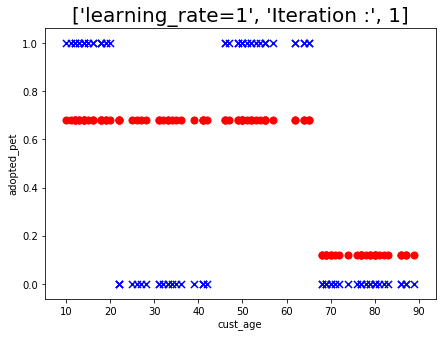

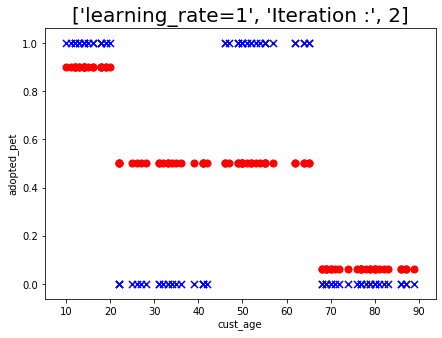

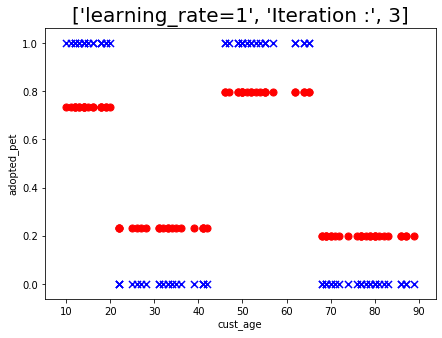

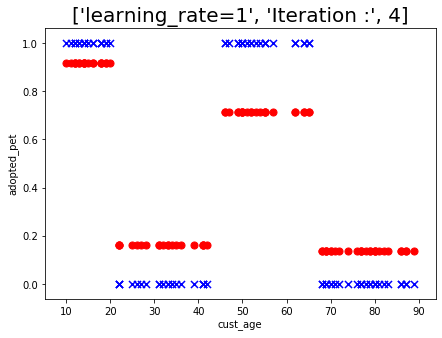

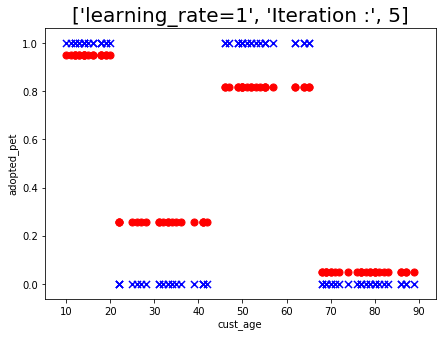

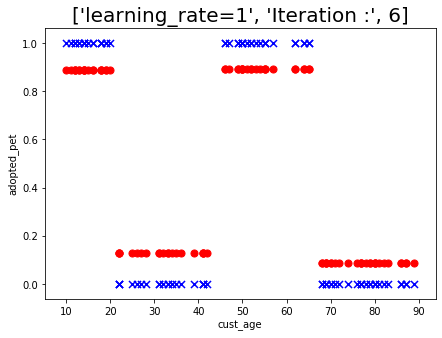

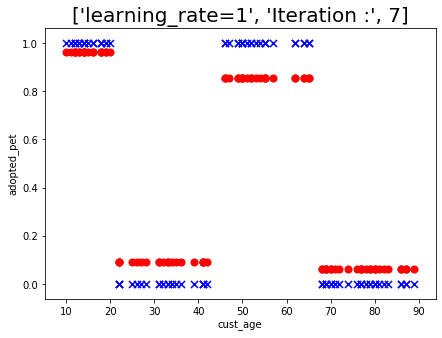

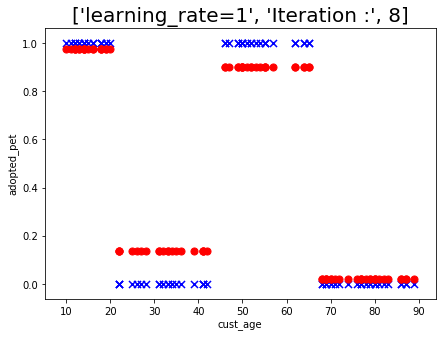

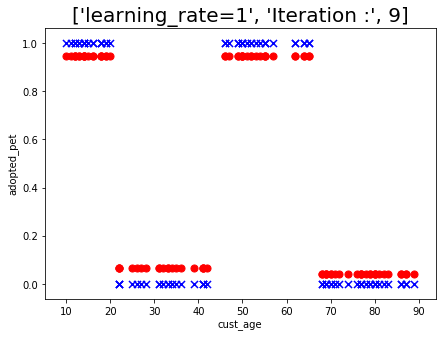

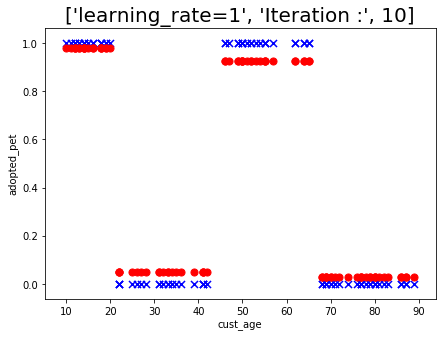

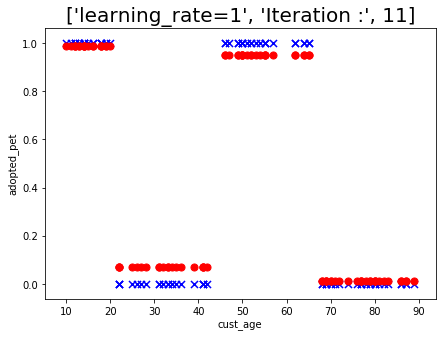

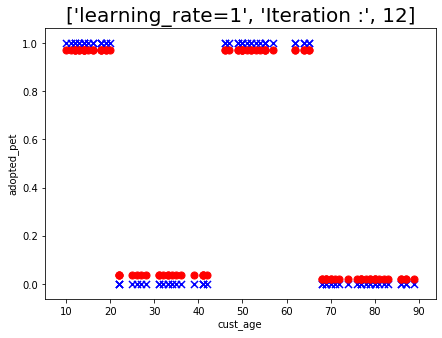

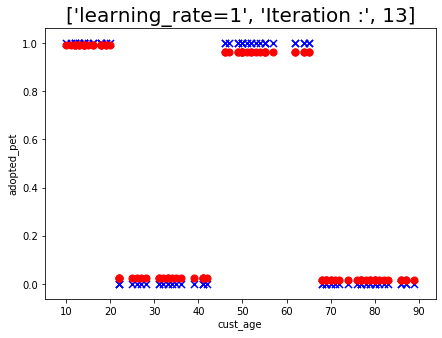

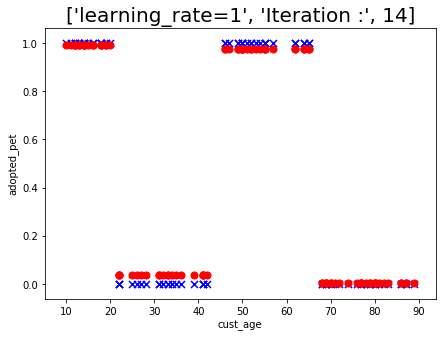

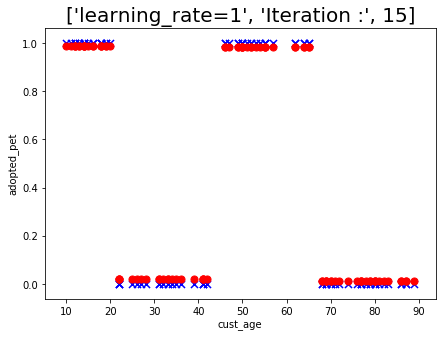

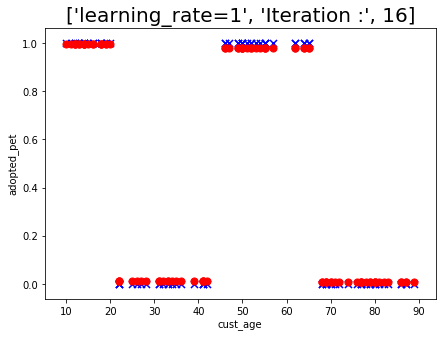

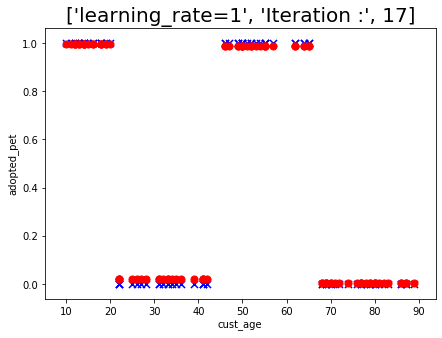

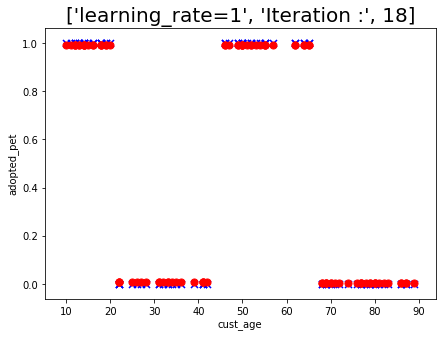

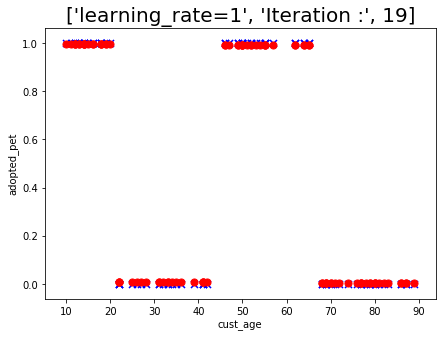

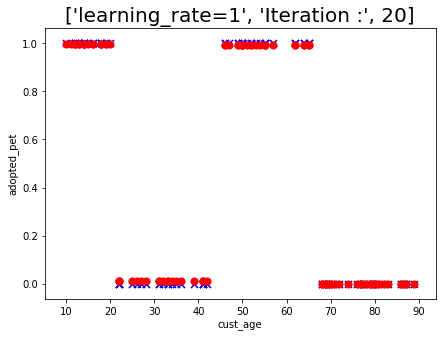

In [14]:
#####GBM illustration
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pets_data = pd.read_csv(r"Datasets/Pet_adoption/adoption.csv")
pets_data.columns.values
pets_data.head(10)


X=pets_data[["cust_age"]]
y=h=pets_data['adopted_pet']


for i in range (1,21):
    
    #Model and predictions 
    boost_model=GradientBoostingClassifier(n_estimators=i,learning_rate=1, max_depth=1)
    boost_model.fit(X,y)
    pets_data["itaration_result"]=boost_model.predict_proba(X)[:,1]
    boost_predict= boost_model.predict(X)
    
    #Graph
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (7,5)
    plt.title(['learning_rate=1', 'Iteration :', i ], fontsize=20)
    ax1 = fig.add_subplot(111)
    ax1.scatter(pets_data["cust_age"],pets_data["adopted_pet"], s=50, c='b', marker="x")
    ax1.scatter(pets_data["cust_age"],pets_data["itaration_result"], s=50, c='r', marker="o")
    ax1.set_xlabel('cust_age')
    ax1.set_ylabel('adopted_pet')
    
    #SSE and Accuracy
    print("SSE : ", sum((pets_data["itaration_result"] - y)**2))
    accuracy=f1_score(y, boost_predict, average='micro')
    print("Accuracy : ", accuracy)

SSE :  21.21493191830362
Accuracy :  0.5217391304347826
SSE :  19.810352339118584
Accuracy :  0.782608695652174
SSE :  18.67468882233319
Accuracy :  0.782608695652174
SSE :  17.645784222431526
Accuracy :  0.782608695652174
SSE :  16.793465822920595
Accuracy :  0.782608695652174
SSE :  16.027888521818348
Accuracy :  0.782608695652174
SSE :  15.387131125486434
Accuracy :  0.782608695652174
SSE :  14.814923120173397
Accuracy :  0.782608695652174
SSE :  14.331881122108056
Accuracy :  0.782608695652174
SSE :  13.90229965952781
Accuracy :  0.782608695652174
SSE :  13.536887627392304
Accuracy :  0.782608695652174
SSE :  13.212925423549853
Accuracy :  0.782608695652174
SSE :  12.935410154696653
Accuracy :  0.782608695652174
SSE :  12.45966526251804
Accuracy :  0.782608695652174
SSE :  12.183289867306748
Accuracy :  0.782608695652174
SSE :  11.742921987949355
Accuracy :  1.0
SSE :  11.487062977045246
Accuracy :  0.782608695652174
SSE :  11.25129530455695
Accuracy :  1.0
SSE :  10.79492370550778

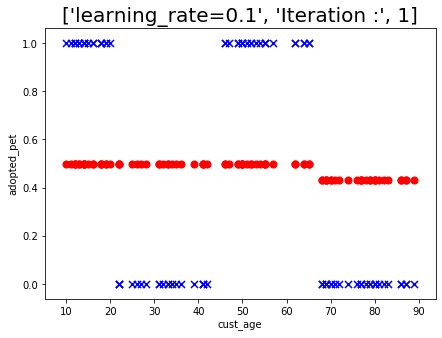

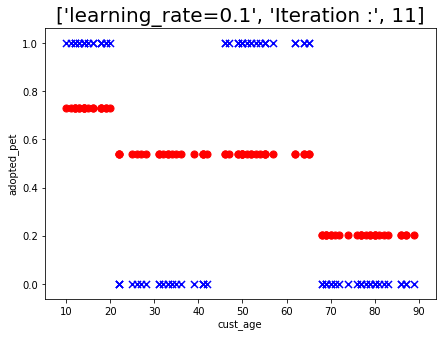

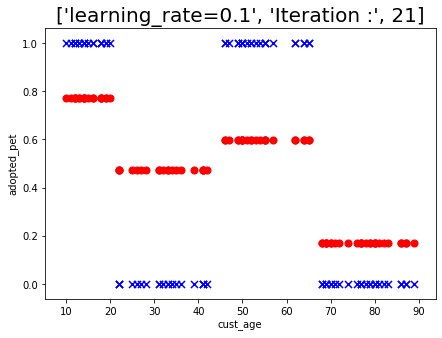

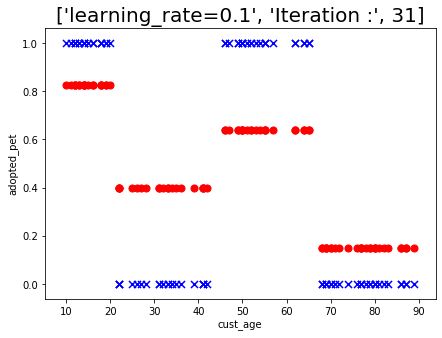

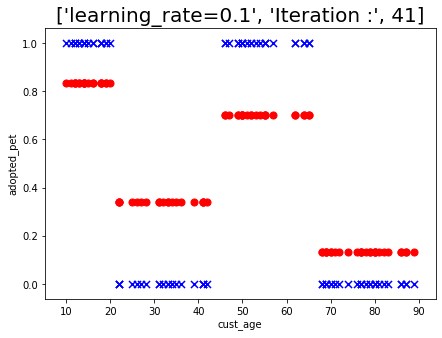

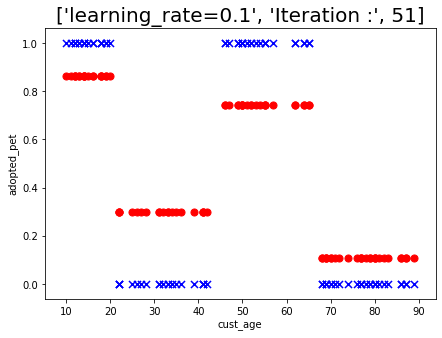

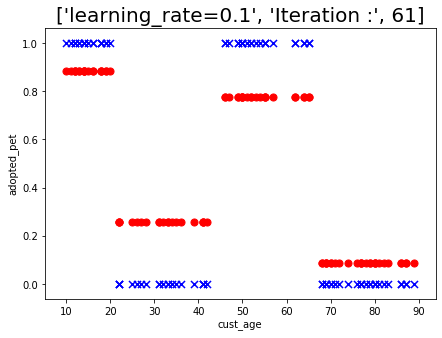

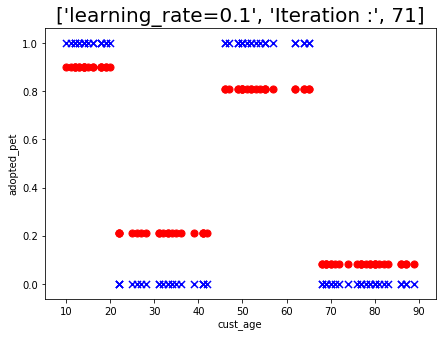

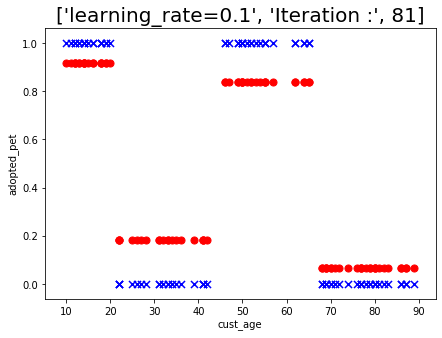

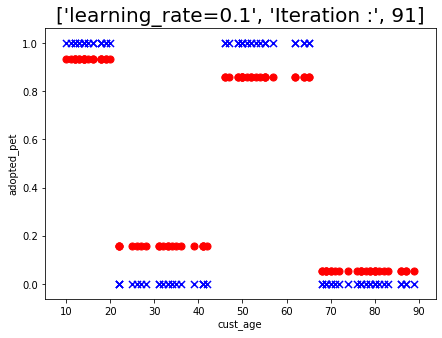

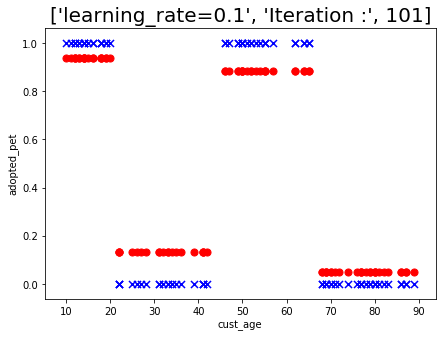

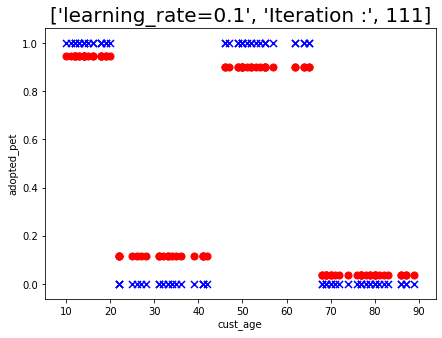

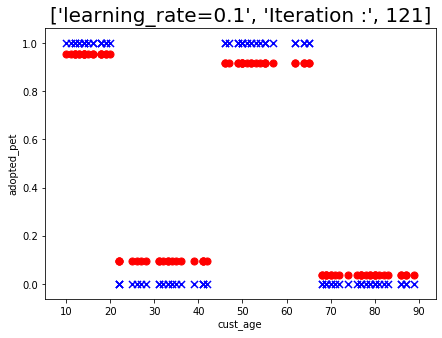

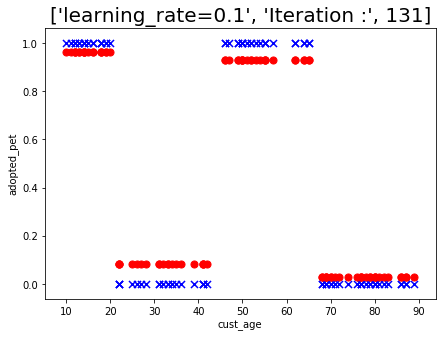

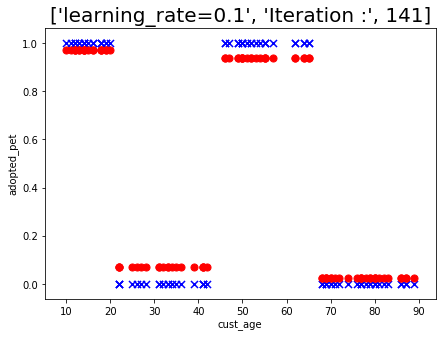

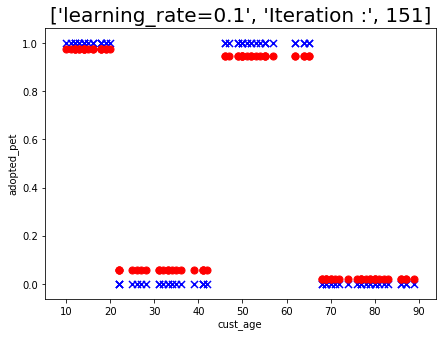

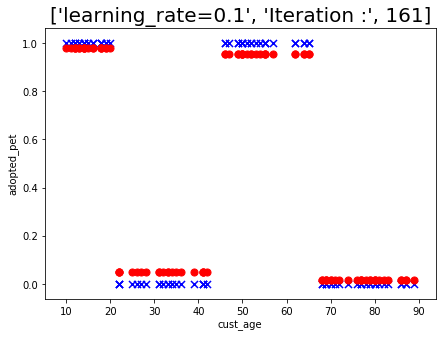

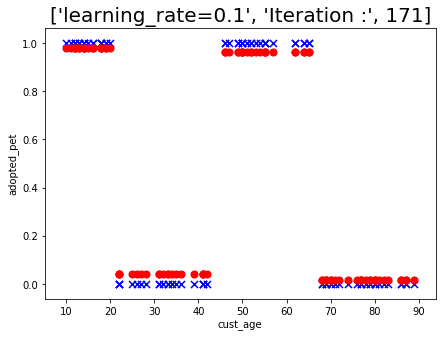

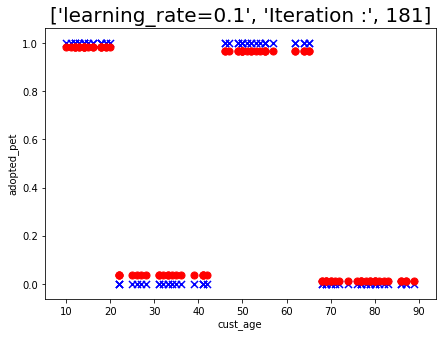

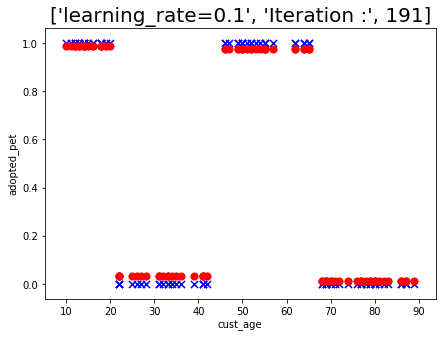

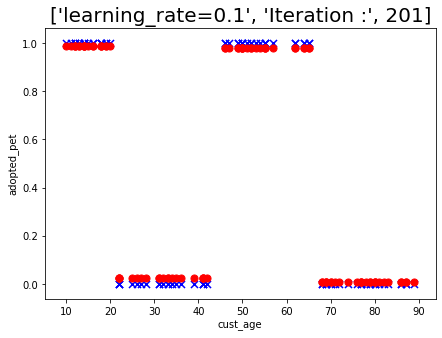

In [15]:
## New learning rate learning_rate=0.1
for i in range (1,202):
    
    #Model and predictions 
    boost_model=GradientBoostingClassifier(n_estimators=i,learning_rate=0.1, max_depth=1)
    boost_model.fit(X,y)
    pets_data["itaration_result"]=boost_model.predict_proba(X)[:,1]
    boost_predict= boost_model.predict(X)
    
    #Graph
    if(np.mod(i, 10) ==1):
        fig = plt.figure()
        plt.rcParams["figure.figsize"] = (7,5)
        plt.title(['learning_rate=0.1', 'Iteration :', i ], fontsize=20)
        ax1 = fig.add_subplot(111)
        ax1.scatter(pets_data["cust_age"],pets_data["adopted_pet"], s=50, c='b', marker="x")
        ax1.scatter(pets_data["cust_age"],pets_data["itaration_result"], s=50, c='r', marker="o")
        ax1.set_xlabel('cust_age')
        ax1.set_ylabel('adopted_pet')
        
    #SSE and Accuracy
    print("SSE : ", sum((pets_data["itaration_result"] - y)**2))
    accuracy=f1_score(y, boost_predict, average='micro')
    print("Accuracy : ", accuracy)

## Income Prediction (Feature Engineering & Gradient Boosting)

In [38]:
#################################
#####Case Study- Income Prediction from Census Data 

income = pd.read_csv(r"Datasets/Adult_Census_Income/Adult_Income.csv")

#Get an idea on number of rows and columns
print(income.shape)
print()
#Print the column names
print(income.columns)
print()
#Print the column types
print(income.info())

(32561, 12)

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'native.country', 'income'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB
None


In [39]:
##Data Exploration
#Summary
all_cols_summary=income.describe()
print(round(all_cols_summary,2))
print()
##Categorical Variables Exploration
categorical_vars=income.select_dtypes(include=['object']).columns
print(categorical_vars)

            age  education.num  capital.gain  capital.loss  hours.per.week
count  32561.00       32561.00      32561.00      32561.00        32561.00
mean      38.58          10.08       1077.65         87.30           40.44
std       13.64           2.57       7385.29        402.96           12.35
min       17.00           1.00          0.00          0.00            1.00
25%       28.00           9.00          0.00          0.00           40.00
50%       37.00          10.00          0.00          0.00           40.00
75%       48.00          12.00          0.00          0.00           45.00
max       90.00          16.00      99999.00       4356.00           99.00

Index(['workclass', 'education', 'marital.status', 'occupation', 'sex',
       'native.country', 'income'],
      dtype='object')


In [40]:
##Frequency tables for all the categorical columns
for col in categorical_vars:
    print("\n\nFrequency Table for the column ", col )
    print(income[col].value_counts())



Frequency Table for the column  workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


Frequency Table for the column  education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


Frequency Table for the column  marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23


In [41]:
##Data Cleaning and Feature Engineering
    
##workclass
income["workclass"] = income["workclass"].replace(['?','Never-worked','Without-pay'], 'Other')  
print(income["workclass"] .value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Other                1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: workclass, dtype: int64


In [42]:
##marital.status
income["marital.status"] = income["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Not-married')
print(income["marital.status"] .value_counts())

Not-married              17144
Married-civ-spouse       14976
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64


In [43]:
##occupation
income["occupation"] = income["occupation"].replace(['?'], 'Other-service')  
print(income["occupation"] .value_counts())

Other-service        5138
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


In [44]:
##Country
freq_country=income["native.country"].value_counts()
less_frequent= freq_country[freq_country <100].index
print(less_frequent)

Index(['Cuba', 'England', 'Jamaica', 'South', 'China', 'Italy',
       'Dominican-Republic', 'Vietnam', 'Guatemala', 'Japan', 'Poland',
       'Columbia', 'Taiwan', 'Haiti', 'Iran', 'Portugal', 'Nicaragua', 'Peru',
       'Greece', 'France', 'Ecuador', 'Ireland', 'Hong', 'Trinadad&Tobago',
       'Cambodia', 'Thailand', 'Laos', 'Yugoslavia',
       'Outlying-US(Guam-USVI-etc)', 'Honduras', 'Hungary', 'Scotland',
       'Holand-Netherlands'],
      dtype='object')


In [45]:
income["native.country"]=income["native.country"].replace([less_frequent], 'Other')
income["native.country"] = income["native.country"].replace(['?'], 'Other')  
print(income["native.country"].value_counts())

United-States    29170
Other             1972
Mexico             643
Philippines        198
Germany            137
Canada             121
Puerto-Rico        114
El-Salvador        106
India              100
Name: native.country, dtype: int64


In [46]:
## Converting Gender into class-0 and Class-1
print(income["sex"].value_counts())
income['sex']=income['sex'].map({'Male': 0, 'Female': 1})

Male      21790
Female    10771
Name: sex, dtype: int64


In [47]:
## Converting target into class-0 and Class-1
print(income["income"].value_counts())
income['income']=income['income'].map({'<=50K': 0, '>50K': 1})

<=50K    24720
>50K      7841
Name: income, dtype: int64


In [48]:
###One hot encoding 
one_hot_cols=['workclass','marital.status','occupation','native.country']
one_hot_data = pd.get_dummies(income[one_hot_cols])
print(one_hot_data.shape)
print(one_hot_data.columns.values)

(32561, 34)
['workclass_Federal-gov' 'workclass_Local-gov' 'workclass_Other'
 'workclass_Private' 'workclass_Self-emp-inc' 'workclass_Self-emp-not-inc'
 'workclass_State-gov' 'marital.status_Married-AF-spouse'
 'marital.status_Married-civ-spouse'
 'marital.status_Married-spouse-absent' 'marital.status_Not-married'
 'occupation_Adm-clerical' 'occupation_Armed-Forces'
 'occupation_Craft-repair' 'occupation_Exec-managerial'
 'occupation_Farming-fishing' 'occupation_Handlers-cleaners'
 'occupation_Machine-op-inspct' 'occupation_Other-service'
 'occupation_Priv-house-serv' 'occupation_Prof-specialty'
 'occupation_Protective-serv' 'occupation_Sales' 'occupation_Tech-support'
 'occupation_Transport-moving' 'native.country_Canada'
 'native.country_El-Salvador' 'native.country_Germany'
 'native.country_India' 'native.country_Mexico' 'native.country_Other'
 'native.country_Philippines' 'native.country_Puerto-Rico'
 'native.country_United-States']


In [49]:
##Final Data
print(income.shape)
income_final = pd.concat([income, one_hot_data], axis=1)
print(income_final.shape)
print(income_final.info())

(32561, 12)
(32561, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 46 columns):
age                                     32561 non-null int64
workclass                               32561 non-null object
education                               32561 non-null object
education.num                           32561 non-null int64
marital.status                          32561 non-null object
occupation                              32561 non-null object
sex                                     32561 non-null int64
capital.gain                            32561 non-null int64
capital.loss                            32561 non-null int64
hours.per.week                          32561 non-null int64
native.country                          32561 non-null object
income                                  32561 non-null int64
workclass_Federal-gov                   32561 non-null uint8
workclass_Local-gov                     32561 non-null uint8
workclas

In [50]:
##Features
one_hot_features=list(one_hot_data.columns.values)
numerical_features=['age',  'education.num', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week']
all_features=one_hot_features+numerical_features
print(all_features)

['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Other', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse', 'marital.status_Married-spouse-absent', 'marital.status_Not-married', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'native.country_Canada', 'native.country_El-Salvador', 'native.country_Germany', 'native.country_India', 'native.country_Mexico', 'native.country_Other', 'native.country_Philippines', 'native.country_Puerto-Rico', 'native.country_United-States', 'age', 'education.num', 'sex', 'capital.gai

In [52]:
##Data
X=income_final[all_features]
y=income_final['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26048, 40)
(26048,)
(6513, 40)
(6513,)


In [53]:
##Model Building
gbm_model1 = GradientBoostingClassifier(learning_rate=0.01, max_depth=4,  n_estimators=100, verbose=1)
gbm_model1.fit(X_train, y_train)

##Validation on train and test data

#Train data
predictions=gbm_model1.predict(X_train)
actuals=y_train
cm = confusion_matrix(actuals,predictions)
print("Confusion Matrix on Train data\n", cm)
accuracy=(cm[0,0]+cm[1,1])/(sum(sum(cm)))
print("Train Accuracy", accuracy)

#Test data
predictions=gbm_model1.predict(X_test)
actuals=y_test
cm = confusion_matrix(actuals,predictions)
print("Confusion Matrix on Test data\n", cm)
accuracy=(cm[0,0]+cm[1,1])/(sum(sum(cm)))
print("Test Accuracy", accuracy)

      Iter       Train Loss   Remaining Time 
         1           1.0889            3.14s
         2           1.0812            2.97s
         3           1.0737            2.77s
         4           1.0664            2.62s
         5           1.0593            2.53s
         6           1.0525            2.45s
         7           1.0457            2.38s
         8           1.0392            2.33s
         9           1.0328            2.29s
        10           1.0266            2.25s
        20           0.9717            1.89s
        30           0.9272            1.64s
        40           0.8902            1.41s
        50           0.8587            1.17s
        60           0.8319            0.93s
        70           0.8086            0.70s
        80           0.7880            0.46s
        90           0.7701            0.23s
       100           0.7544            0.00s
Confusion Matrix on Train data
 [[19568   288]
 [ 3865  2327]]
Train Accuracy 0.8405635749385749
Co

In [54]:
##Loop for different iterations
for i in range(5,1000, 50):
    gbm_model1 = GradientBoostingClassifier(learning_rate=0.01, max_depth=4,  n_estimators=i)
    gbm_model1.fit(X_train, y_train)
    
    print("N_estimators=" , i)
    #Train data
    predictions=gbm_model1.predict(X_train)
    actuals=y_train
    cm = confusion_matrix(actuals,predictions)
    accuracy=(cm[0,0]+cm[1,1])/(sum(sum(cm)))
    print("Train Accuracy", accuracy)

    #Test data
    predictions=gbm_model1.predict(X_test)
    actuals=y_test
    cm = confusion_matrix(actuals,predictions)
    accuracy=(cm[0,0]+cm[1,1])/(sum(sum(cm)))
    print("Test Accuracy", accuracy)

N_estimators= 5
Train Accuracy 0.7622850122850123
Test Accuracy 0.7468140641793336
N_estimators= 55
Train Accuracy 0.816838144963145
Test Accuracy 0.8071549209273761
N_estimators= 105
Train Accuracy 0.847166769041769
Test Accuracy 0.841087056655919
N_estimators= 155
Train Accuracy 0.8548832923832924
Test Accuracy 0.8481498541378781
N_estimators= 205
Train Accuracy 0.8589910933660934
Test Accuracy 0.8550591125441425
N_estimators= 255
Train Accuracy 0.8608722358722358
Test Accuracy 0.8592046675879011
N_estimators= 305
Train Accuracy 0.8626382063882064
Test Accuracy 0.8607400583448488
N_estimators= 355
Train Accuracy 0.8636363636363636
Test Accuracy 0.8602794411177644
N_estimators= 405
Train Accuracy 0.8647496928746928
Test Accuracy 0.8595117457392907
N_estimators= 455
Train Accuracy 0.8655175061425061
Test Accuracy 0.8615077537233226
N_estimators= 505
Train Accuracy 0.867360257985258
Test Accuracy 0.8627360663288807
N_estimators= 555
Train Accuracy 0.8685119778869779
Test Accuracy 0.8641